In [2]:
import numpy as np
import os, h5py
import matplotlib.pyplot as plt
from sklearn import decomposition

%matplotlib inline

In [3]:
source = '/home/sobolev/nevermind/Andrey/data'
report = '/home/sobolev/nevermind/Andrey/analysis/AEPs'

selected_sessions = [
'009266_hippoSIT_2023-04-17_17-04-17',  # ch17, 20 + 55 correction, 5067 events. Showcase for N2 / N3 mod in target
'009266_hippoSIT_2023-04-18_10-10-37',  # ch17, 10 + 55 correction, 5682 events
'009266_hippoSIT_2023-04-18_17-03-10',  # ch17, 6 + 55 correction, 5494 events: FIXME very weird 1-2nd in target, find out
'009266_hippoSIT_2023-04-19_10-33-51',  # ch17, 4 + 55 correction, 6424 events: very weird 1-2nd in target, find out
'009266_hippoSIT_2023-04-20_08-57-39',  # ch1, 1 + 55 correction, 6424 events. Showcase for N2 / N3 mod in target
'009266_hippoSIT_2023-04-24_16-56-55',  # ch17, 5 + 55* correction, 6165 events, frequency
'009266_hippoSIT_2023-04-26_08-20-17',  # ch17, 12 + 55* correction, 6095 events, duration - showcase for N2 
'009266_hippoSIT_2023-05-02_12-22-14',  # ch20, 10 + 55 correction, 5976 events, FIXME very weird 1-2nd in target, find out
'009266_hippoSIT_2023-05-04_09-11-06',  # ch17, 5 + 55* correction, 4487 events, coma session with baseline AEPs
'009266_hippoSIT_2023-05-04_19-47-15',  # ch20, 2 + 55 correction, 5678 events, duration
]

session = selected_sessions[0]

animal      = session.split('_')[0]
sessionpath = os.path.join(source, animal, session)
aeps_file   = os.path.join(sessionpath, 'AEPs.h5')
h5name      = os.path.join(sessionpath, session + '.h5')

In [4]:
with h5py.File(h5name, 'r') as f:
    tl = np.array(f['processed']['timeline'])  # time, X, Y, speed, etc.
    trials = np.array(f['processed']['trial_idxs'])  # t_start_idx, t_end_idx, x_tgt, y_tgt, r_tgt, result
    
with h5py.File(aeps_file, 'r') as f:
    aeps = np.array(f['aeps'])
    aeps_events = np.array(f['aeps_events'])
    
# TODO find better way. Remove outliers
aeps[aeps > 5000]  = 5000
aeps[aeps < -5000] = -5000

# load metrics
AEP_metrics_lims = {}
AEP_metrics_raw  = {}
AEP_metrics_norm = {}
with h5py.File(aeps_file, 'r') as f:
    for metric_name in f['raw']:
        AEP_metrics_raw[metric_name]  = np.array(f['raw'][metric_name])
        AEP_metrics_norm[metric_name] = np.array(f['norm'][metric_name])
        AEP_metrics_lims[metric_name] = [int(x) for x in f['raw'][metric_name].attrs['limits'].split(',')]

len(aeps)

5067

In [554]:
# do PCA on AEPS
from sklearn import decomposition

#fet_matrix = np.vstack(AEP_metrics_raw.values()).T
fet_matrix = aeps

pca = decomposition.PCA(n_components=3)
pca.fit(fet_matrix)
X = pca.transform(fet_matrix)
# try normalized / not

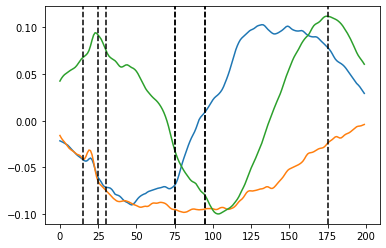

In [555]:
fig, ax = plt.subplots(1, 1)
ax.plot(pca.components_[0])
ax.plot(pca.components_[1])
ax.plot(pca.components_[2])
for key, value in AEP_metrics_lims.items():
    ax.axvline(value[0], color='black', ls='--')
    ax.axvline(value[1], color='black', ls='--')

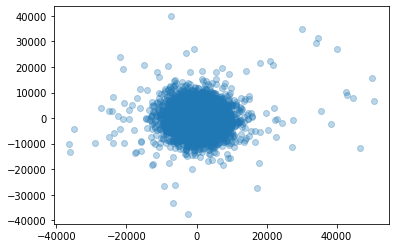

In [526]:
fig, ax = plt.subplots(1, 1)
#_ = ax.hist2d(X[:, 1], X[:, 2], bins=30)
_ = ax.scatter(X[:, 0], X[:, 1], alpha=0.3)

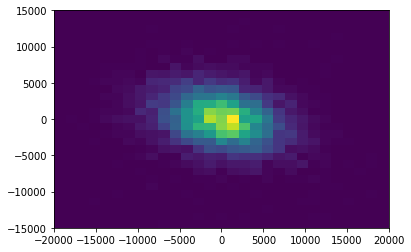

In [68]:
fig, ax = plt.subplots(1, 1)
_ = ax.hist2d(X[:, 0], X[:, 1], bins=[np.linspace(-20000, 20000, 30), np.linspace(-15000, 15000, 30)])

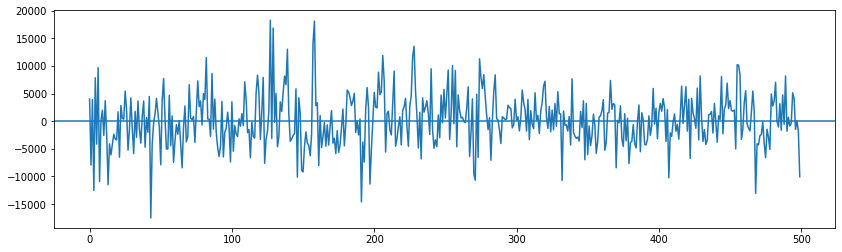

In [72]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(X[:, 0][4450:4530])
#ax.plot(X[:, 0][4240:4260])
#ax.plot(X[:, 0][1040:1080])
ax.plot(X[:, 0][500:1000])
ax.axhline(0)